<img src="Tut 1.5.JPG" width="900" />

In [11]:
from numpy import log, array, exp, linspace, asarray, argmax, interp
from scipy.integrate import odeint
from scipy.stats import linregress 
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#The system is in the batch:
K    = 0.25 #L/mol.min
Vo   =    1 #L
CAo  =    5 #mol/L
CBo  =    0 #mol/L
CBin =    5 #mol/L
Q    = 0.05 #L/min

Intrinsic rate equations:
\begin{align}
r_{A} &= -k_{i}C_{A}C_{B} \\
r_{B} &= -r_{A}
\end{align}

Mole balance for species $A$:
\begin{align}
F_{A_{0}} - F_{A} + r_{A}V &= \dfrac{dN_{A}}{dt} \nonumber \\
r_{A}V &= \dfrac{d(C_{A}V)}{dt} \nonumber \\
r_{A}V &= V\dfrac{d(C_{A})}{dt} + C_{A}\dfrac{d(V)}{dt} \\
\end{align}

Overall mass balance for the semi-batch reactor:
\begin{align}
\rho_{0}Q_{0} -0 +0 &= \dfrac{d(\rho V)}{dt} \nonumber
\end{align}
Assume a constant density system:
\begin{align}
\rho_{0} &= \rho \nonumber \\
\therefore \dfrac{dV}{dt} &= Q_{0} \\
\int_{v_{0}}^{v} dV &= Q_{0}\int_{0}^{t}dt \nonumber \\
\therefore v &= v_{0} + Q_{0}t
\end{align}

Substituting eq.$4$ into eq.$3$ :
\begin{align}
\therefore r_{A}V &= V\dfrac{dC_{A}}{dt} + C_{A}Q_{0} \nonumber \\
\dfrac{dC_{A}}{dt} &= r_{A} - \dfrac{Q_{0}C_{A}}{V} \\
\dfrac{dC_{A}}{dt} &= -k_{i}C_{A}C_{B} - \dfrac{Q_{0}C_{A}}{V}
\end{align}

Mole balance for species $B$:
\begin{align}
F_{B_{0}} - F_{B} + r_{B}V &= \dfrac{dN_{B}}{dt} \nonumber \\
Q_{0}C_{B_{0}} - 0 + r_{B}V &= \dfrac{d(C_{B}V)}{dt} \nonumber \\
Q_{0}C_{B_{0}} + r_{B}V &= V\dfrac{d(C_{B})}{dt} + C_{B}\dfrac{d(V)}{dt} \nonumber \\
But\ \dfrac{dV}{dt} &= Q_{0} \nonumber \\
\therefore Q_{0}C_{B_{0}} + r_{B}V &= V\dfrac{d(C_{B})}{dt} + C_{B}Q_{0} \nonumber \\
r_{B}V &= V\dfrac{d(C_{B})}{dt} + Q_{0}(C_{B} - C_{B_{0}})\nonumber \\
\dfrac{d(C_{B})}{dt} &= -r_{A} - \dfrac{Q_{0}(C_{B} - C_{B_{0}})}{V} \nonumber \\
\dfrac{d(C_{B})}{dt} &= k_{i}C_{A}C_{B} + \dfrac{Q_{0}(C_{B_{0}} - C_{B})}{V}
\end{align}

Time to completion:
\begin{align}
N_{A_{0}} &= C_{A_{0}}V_{0} \nonumber \\
&= 5\dfrac{mol}{L} \times 1L \nonumber \\
&= 5mol \nonumber
\end{align}
Therefore $5~mol$ of $B$ is required.

Rate of $B$ added:
\begin{align}
C_{B}Q_{0} &= 5\dfrac{mol}{L} \times 0.05\dfrac{L}{min} \nonumber \\
&= 0.25\dfrac{mol}{min}
\end{align}

Time to completion:
\begin{align}
5.molB \times \dfrac{min}{0.25molB}&= 20min \nonumber
\end{align}

In [13]:
def sembatch(C,t):
    CA, CB, V= C[0], C[1], C[2]
    dCAdt    = -K*CA*CB - Q*CA/V
    dCBdt    = K*CA*CB + (Q/V)*(CBin - CB)
    dVdt     = Q
    return [dCAdt, dCBdt, dVdt]

tspan = linspace(0, 20, 100)

ans = odeint(sembatch,[CAo,CBo,Vo],tspan) #in the reactor, initial concentration is 0

CA, CB, V = ans.T
rA = -K*CA*CB

In [14]:
#var = asarray([sembatch[y,tspan] for y in ans]) # C is results from odeint
#rA = -K*var[:,0]*var[:,1]
#CA = var[:,0]
#CB = var[:,1]
#V = var[:,2]


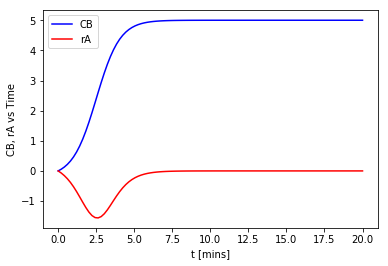

In [15]:
plt.figure(1)
plt.plot(tspan, CB, color='blue', label='CB')
plt.plot(tspan, rA, color='red',label='rA')
plt.legend(loc='best')
plt.ylabel('CB, rA vs Time') 
plt.xlabel('t [mins]') 
plt.show()

In [16]:
i = argmax(rA == min(rA))
rAmax = rA[i]
print('rAmax=',rAmax,'molA/L.min')

rAmax= -1.559815726276219 molA/L.min


In [17]:
#t_rAmax = interp(rAmax,rA[::-1],tspan[::-1])
#print ('Time max rA observed: ', t_rAmax, 'mins')

In [18]:
print('Time max rA is observed: ',tspan[i], 'mins')

Time max rA is observed:  2.6262626262626263 mins
